# JTRENTA

**Renta de maquinaria ligera para construcción**

<img style="margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRDgeT4J9hue8ROF3XdvAmhWGoNyQR0GLJ99w&s" width="250px" height="250" />


### Equipo:

- Delia Michelle Trigo Fernández
- Damarys Valenzuela Santos
- Ana Sofía Avila Gálvez

### Objetivo
El objetivo de este proyecto es identificar y calcular indicadores clave para una empresa de renta de maquinaria para construcción, enfocada principalmente en aumentar sus ingresos, que puedan ayudarnos a identificar y monitorear métricas que impulsen su crecimiento financiero.

### KPI
* **Customer Lifetime Value (CLTV o LTV):**
Predice el ingreso total que un negocio puede esperar de un cliente a través de la relación comercial que tenga con el negocio. Este KPI puede indicar la capacidad de maximizar el valor de cada cliente.
* **Tasa de crecimiento de ingresos:** Indica el ritmo al cual el ingreso de la compañía esta creciento, ayudando a medir el éxito de las estrategias de ventas y marketing.
    

### Datos disponibles
* ID de la transacción
* Fecha de la transacción
* Tipo de transacción
* Producto solicitado
* Cantidad de días
* Precio por día
* Cliente que lo solicita
* Total de la transacción
* Línea del producto

#### Visualización de datos

<Axes: xlabel='LINEA'>

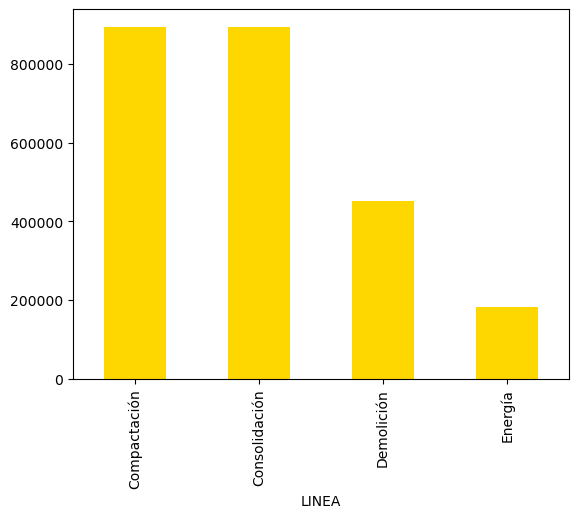

In [ ]:
df.groupby('LINEA')['TOTAL'].sum().plot(kind='bar', color='gold')

<Axes: xlabel='PRODUCTO'>

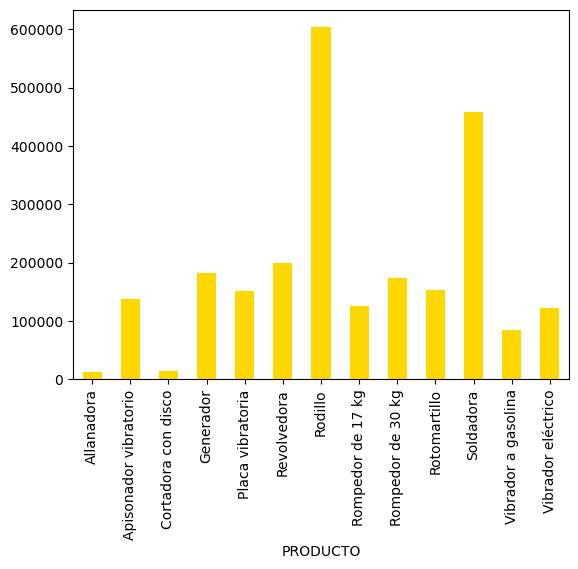

In [ ]:
df.groupby('PRODUCTO')['TOTAL'].sum().plot(kind='bar', color='gold')

<Axes: xlabel='CLIENTE'>

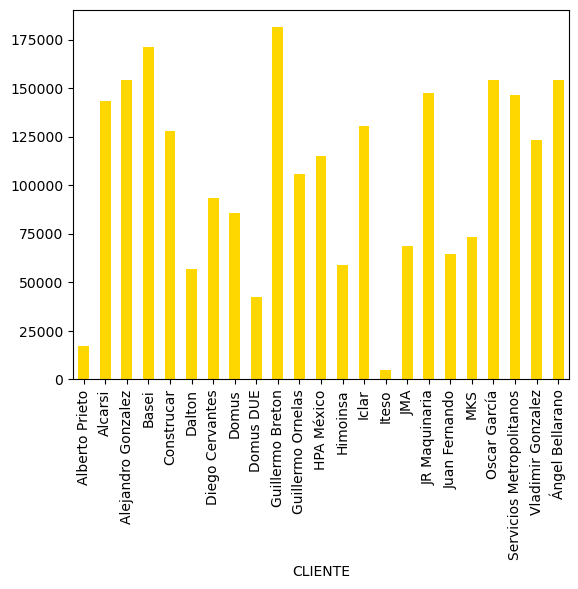

In [ ]:
df.groupby('CLIENTE')['TOTAL'].sum().plot(kind='bar', color='gold')

#### LTV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('BasededatosRENTAS.csv')
df.head()

,ID,FECHA,TIPO_DE_TRANSACCION,PRODUCTO,LINEA,CANTIDAD,PRECIO_UNITARIO,CLIENTE,TOTAL
0,11289,01/01/24,Renta,Rompedor de 30 kg,Demolición,26,340,Guillermo Breton,8840
1,11290,01/01/24,Renta,Vibrador eléctrico,Consolidación,9,190,Himoinsa,1710
2,11291,01/01/24,Renta,Rodillo,Compactación,19,1000,Alcarsi,19000
3,11292,01/01/24,Renta,Soldadora,Consolidación,2,700,Vladimir Gonzalez,1400
4,11293,01/01/24,Renta,Vibrador a gasolina,Consolidación,6,190,Oscar García,1140


In [ ]:
df['LTV'] = df.groupby('CLIENTE')['TOTAL'].transform('mean')
df.head()

,ID,FECHA,TIPO_DE_TRANSACCION,PRODUCTO,LINEA,CANTIDAD,PRECIO_UNITARIO,CLIENTE,TOTAL,LTV
0,11289,01/01/24,Renta,Rompedor de 30 kg,Demolición,26,340,Guillermo Breton,8840,6715.185185
1,11290,01/01/24,Renta,Vibrador eléctrico,Consolidación,9,190,Himoinsa,1710,2464.166667
2,11291,01/01/24,Renta,Rodillo,Compactación,19,1000,Alcarsi,19000,5307.407407
3,11292,01/01/24,Renta,Soldadora,Consolidación,2,700,Vladimir Gonzalez,1400,5137.500000
4,11293,01/01/24,Renta,Vibrador a gasolina,Consolidación,6,190,Oscar García,1140,5708.148148


In [ ]:
ltv_cliente= df.groupby(['CLIENTE'])['LTV'].mean().reset_index()
ltv_cliente.head()

,CLIENTE,LTV
0,Alberto Prieto,2153.750000
1,Alcarsi,5307.407407
2,Alejandro Gonzalez,5707.037037
3,Basei,6349.259259
4,Construcar,4735.185185


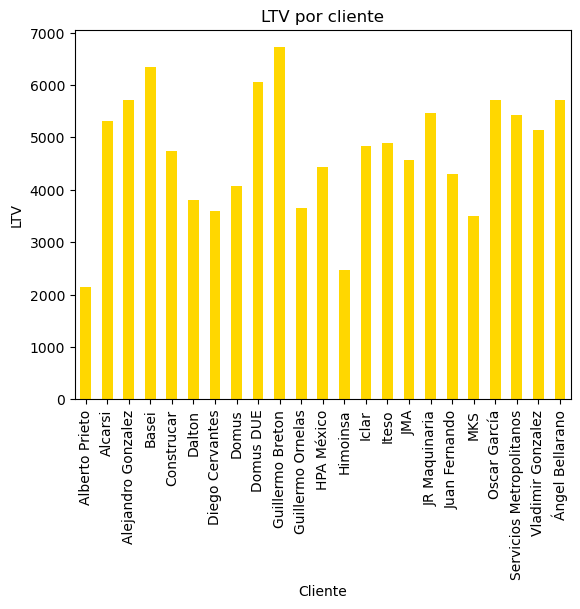

In [ ]:
df.groupby('CLIENTE')['LTV'].mean().plot(kind='bar', color='gold')

plt.title('LTV por cliente')
plt.xlabel('Cliente')
plt.ylabel('LTV')
plt.show()

#### Tasa de crecimiento de ingresos

 **Formula:** $\text{Tasa de crecimiento de ingresos} = \frac{\text{Ingresos del periodo actual}}{\text{Ingresos del periodo pasado}} - 1$

In [ ]:
TCI = {
    'MES': ['Enero', 'Febrero', 'Marzo'],
    'TOTAL': [df.iloc[:122]['TOTAL'].sum() ,df.iloc[122:286]['TOTAL'].sum() , df.iloc[286:502]['TOTAL'].sum()],
    'TCI':[0,(df.iloc[122:286]['TOTAL'].sum()/df.iloc[:122]['TOTAL'].sum())-1,(df.iloc[286:502]['TOTAL'].sum()/df.iloc[122:286]['TOTAL'].sum())-1]
}
TCI=pd.DataFrame(TCI)
TCI.set_index('MES', inplace=True)
TCI

,TOTAL,TCI
MES,,
Enero,648260,0.000000
Febrero,863940,0.332706
Marzo,909220,0.052411


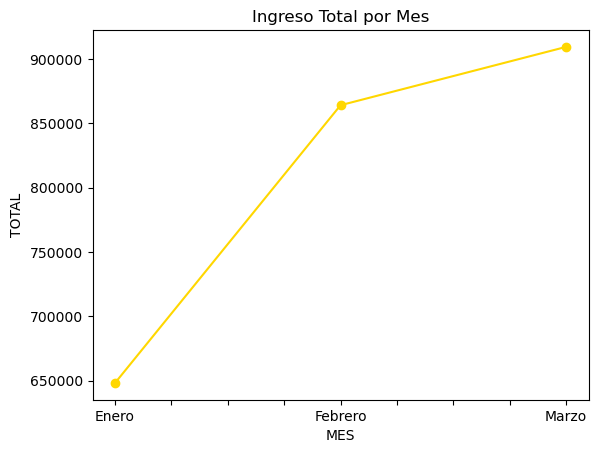

In [ ]:
TCI['TOTAL'].plot(kind='line', marker='o', color='gold')
plt.title('Ingreso Total por Mes')
plt.xlabel('MES')
plt.ylabel('TOTAL')

plt.show()

#### Agrupación de segmentos

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [ ]:
categorical_features = ['TIPO_DE_TRANSACCION','PRODUCTO','LINEA']
numerical_features = ['CANTIDAD']

In [ ]:
encoded_features = pd.get_dummies(df[categorical_features],
               columns=categorical_features,
               drop_first=True)
encoded_features

,PRODUCTO_Apisonador vibratorio,PRODUCTO_Cortadora con disco,PRODUCTO_Generador,PRODUCTO_Placa vibratoria,PRODUCTO_Revolvedora,PRODUCTO_Rodillo,PRODUCTO_Rompedor de 17 kg,PRODUCTO_Rompedor de 30 kg,PRODUCTO_Rotomartillo,PRODUCTO_Soldadora,PRODUCTO_Vibrador a gasolina,PRODUCTO_Vibrador eléctrico,LINEA_Consolidación,LINEA_Demolición,LINEA_Energía
0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
498,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
499,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
500,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
data_to_model_standarized = StandardScaler().fit_transform(df[numerical_features])

data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

encoded_features_df = encoded_features.reset_index()

data_to_model = data_to_model_df.merge(encoded_features_df, on='index')

data_to_model = data_to_model.drop('index', axis=1)

C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

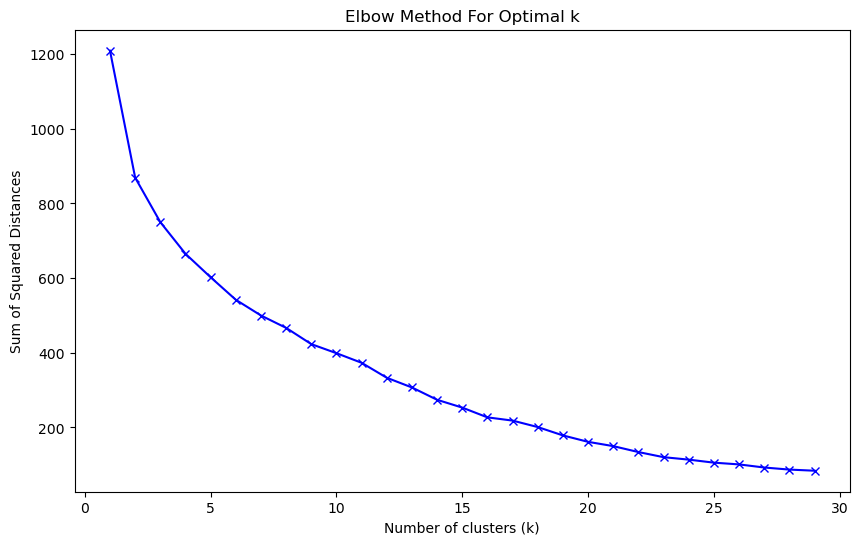

In [ ]:
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_to_model)

C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\damar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [ ]:
df['cluster'] = labels
df.head()

,ID,FECHA,TIPO_DE_TRANSACCION,PRODUCTO,LINEA,CANTIDAD,PRECIO_UNITARIO,CLIENTE,TOTAL,LTV,cluster
0,11289,01/01/24,Renta,Rompedor de 30 kg,Demolición,26,340,Guillermo Breton,8840,6715.185185,1
1,11290,01/01/24,Renta,Vibrador eléctrico,Consolidación,9,190,Himoinsa,1710,2464.166667,0
2,11291,01/01/24,Renta,Rodillo,Compactación,19,1000,Alcarsi,19000,5307.407407,1
3,11292,01/01/24,Renta,Soldadora,Consolidación,2,700,Vladimir Gonzalez,1400,5137.500000,0
4,11293,01/01/24,Renta,Vibrador a gasolina,Consolidación,6,190,Oscar García,1140,5708.148148,0


In [ ]:
def boxplot_clusters(col):
    sns.boxplot(x='cluster', y=col, data=df, hue='cluster')
    plt.show()

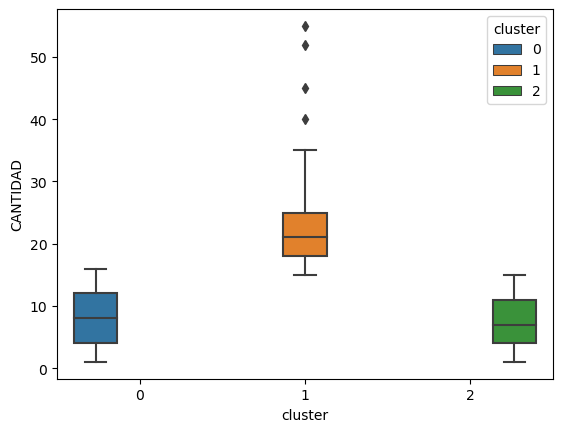

In [ ]:
boxplot_clusters('CANTIDAD')

In [ ]:
def barplot_clusters(col):
    sns.countplot(x='cluster', hue=col, data=df)
    plt.show()

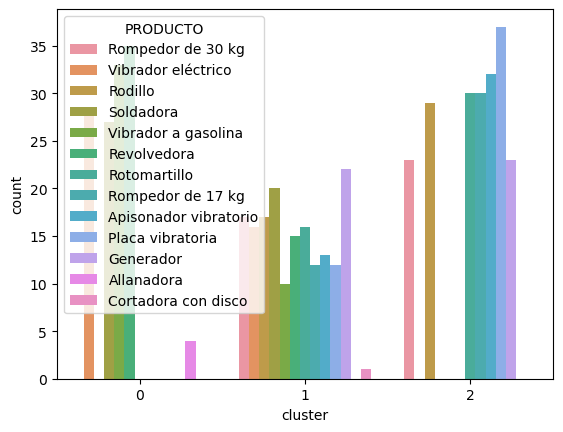

In [ ]:
barplot_clusters('PRODUCTO')

In [ ]:
df['cluster_0'] = np.where(df['cluster'] == 0, 1, 0)
df['cluster_1'] = np.where(df['cluster'] == 1, 1, 0)
df['cluster_2'] = np.where(df['cluster'] == 2, 1, 0)

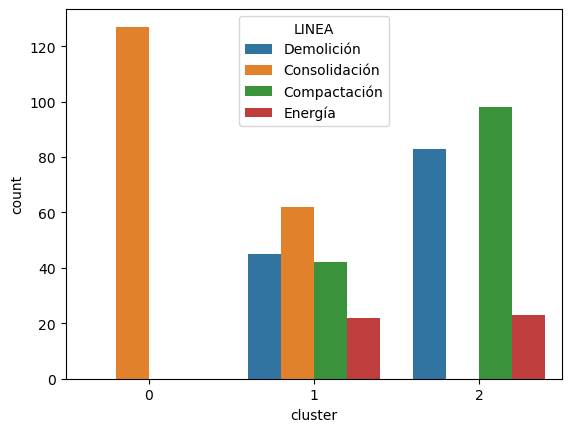

In [ ]:
barplot_clusters('LINEA')

#### Modelo de regresión lineal

In [ ]:
import statsmodels.api as sm
x = ['CANTIDAD','TOTAL','cluster_0','cluster_1','cluster_2']
y = ['LTV']

In [ ]:
X = sm.add_constant(df[x])

model = sm.OLS(df[y], X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    LTV   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.230
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           6.76e-05
Time:                        14:41:19   Log-Likelihood:                -4215.6
No. Observations:                 502   AIC:                             8441.
Df Residuals:                     497   BIC:                             8462.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3384.3795    102.051     33.164      0.0

In [ ]:
new_customer_data = {
    'const': [1],
    'CANTIDAD': [2],
    'TOTAL ': [1000],
    'cluster_0': [1],
    'cluster_1': [0],
    'cluster_2': [0],
}

new_customer_df = pd.DataFrame(new_customer_data)

predicted_ltv = results.predict(new_customer_df)

print(f"Predicted LTV for the new customer: ${predicted_ltv[0]:,.2f}")

Predicted LTV for the new customer: $4,596.87


#### SEM

In [ ]:
import pandas as pd
import numpy as np
from semopy import Model, Optimizer
import matplotlib.pyplot as plt
from semopy import Model, Optimizer , semplot

# Definir el modelo SEM usando la notación estándar de SEM
model_desc = """
# Latent Variables
Uso_Maquinaria =~ CANTIDAD
Costos_Precios =~ PRECIO_UNITARIO + TOTAL

# Variances and Covariances
Uso_Maquinaria ~~ Costos_Precios
"""

In [ ]:
df_data = pd.read_csv('BasededatosRENTAS.csv')
df_data

,ID,FECHA,TIPO_DE_TRANSACCION,PRODUCTO,LINEA,CANTIDAD,PRECIO_UNITARIO,CLIENTE,TOTAL
0,11289,01/01/24,Renta,Rompedor de 30 kg,Demolición,26,340,Guillermo Breton,8840
1,11290,01/01/24,Renta,Vibrador eléctrico,Consolidación,9,190,Himoinsa,1710
2,11291,01/01/24,Renta,Rodillo,Compactación,19,1000,Alcarsi,19000
3,11292,01/01/24,Renta,Soldadora,Consolidación,2,700,Vladimir Gonzalez,1400
4,11293,01/01/24,Renta,Vibrador a gasolina,Consolidación,6,190,Oscar García,1140
...,...,...,...,...,...,...,...,...,...
497,11668,31/03/24,Renta,Vibrador eléctrico,Consolidación,7,190,Ángel Bellarano,1330
498,11669,31/03/24,Renta,Rotomartillo,Demolición,12,260,Domus,3120
499,11788,31/03/24,Renta,Revolvedora,Consolidación,4,280,Domus,1120
500,11789,31/03/24,Renta,Rompedor de 30 kg,Demolición,7,340,Ángel Bellarano,2380


In [ ]:
mod = Model(model_desc)
res_opt = mod.fit(df_data)
estimates = mod.inspect()

# Imprimir los resultados del ajuste del modelo
print(estimates)

              lval  op             rval      Estimate         Std. Err  \
0         CANTIDAD   ~   Uso_Maquinaria  1.000000e+00                -   
1  PRECIO_UNITARIO   ~   Costos_Precios  1.000000e+00                -   
2            TOTAL   ~   Costos_Precios  6.036827e+02        773.92385   
3   Uso_Maquinaria  ~~   Costos_Precios  4.910640e+01         62.99572   
4   Uso_Maquinaria  ~~   Uso_Maquinaria  1.705995e+01         2.155211   
5   Costos_Precios  ~~   Costos_Precios  4.166570e+01       111.163056   
6         CANTIDAD  ~~         CANTIDAD  5.123026e+01         2.155211   
7  PRECIO_UNITARIO  ~~  PRECIO_UNITARIO  2.909510e+04      1837.199058   
8            TOTAL  ~~            TOTAL  1.418337e+07  18925396.495771   

     z-value   p-value  
0          -         -  
1          -         -  
2   0.780029  0.435374  
3    0.77952  0.435674  
4   7.915673       0.0  
5   0.374816  0.707797  
6   23.77041       0.0  
7  15.836663       0.0  
8   0.749436  0.453595  


In [ ]:
print(res_opt)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 1.482
Number of iterations: 49
Params: 603.683 49.106 17.060 51.230 41.666 29095.103 14183371.416


In [ ]:
# Cargar factores estimados (cargas factoriales)
Uso_Maquinaria_Factors = [1.0]
Costos_Precios_Factors = [1.0,603.6827]

# Función para calcular el valor de la variable latente
def calculate_latent_values(df):
    # Calcular Uso_Maquinaria como la suma ponderada
    df['Uso_Maquinaria'] = (df['CANTIDAD'] * Uso_Maquinaria_Factors[0])

    # Calcular Costos_Precio como la suma ponderada
    df['Costos_Precio'] = (df['PRECIO_UNITARIO'] * Costos_Precios_Factors[0] +
                     df['TOTAL'] * Costos_Precios_Factors[1])

    return df[['Uso_Maquinaria', 'Costos_Precio']]

# Calcular valores latentes en el dataset
latent_values = calculate_latent_values(df_data)

# Mostrar los primeros valores calculados
print(latent_values.head())

   Uso_Maquinaria  Costos_Precio
0            26.0   5.336895e+06
1             9.0   1.032487e+06
2            19.0   1.147097e+07
3             2.0   8.458558e+05
4             6.0   6.883883e+05


### Análisis del Modelo SEM y Resultados

Este análisis intenta entender cómo se relacionan dos cosas: **cuánto se usa la maquinaria** y **los costos o precios**. Utilizamos un modelo para ver si hay una conexión clara entre estas dos variables.

#### Estimaciones de Parámetros, ¿Qué encontramos?

1. **Relación entre el Uso y los Costos**:
   - La **cantidad de uso de la maquinaria** se puso como referencia, lo que significa que se tomó como punto de partida para medir la influencia en el análisis, con un valor de **1.0**.
   - En el caso de los **costos y precios**, tomamos también el **precio unitario** como referencia, con un valor de **1.0**.
   - Para el **total de la transacción**, la relación con los costos fue estimada en **603.683**, lo que indica que el total varía bastante con respecto al precio y la cantidad utilizada, pero hay cierta incertidumbre en esta estimación (error estándar de **773.924**).

2. **Covarianza entre las Variables Latentes**:
   - La covarianza entre **Uso de Maquinaria** y **Costos y Precios** fue de **49.106**, lo que sugiere que, aunque no es una relación extremadamente fuerte, sí hay una tendencia a que cuando se usa más maquinaria, los costos aumenten un poco.
   
3. **Variación en los Datos**:
   - La variabilidad de **Uso de Maquinaria** fue de **17.060**, lo que muestra una diferencia moderada en la cantidad de veces que se usa la maquinaria.
   - Para **Costos y Precios**, la variabilidad fue mayor, con un valor de **41.666**, lo que sugiere que hay más diferencias en los costos y precios que en la cantidad de uso.
   - Cuando vemos la variación en las variables originales:
     - **CANTIDAD** mostró una variabilidad de **51.230**, indicando que las veces que se usa el equipo pueden cambiar bastante.
     - **PRECIO_UNITARIO** tuvo una variabilidad muy alta de **29095.103**, lo que significa que los precios varian mucho de una transacción a otra.
     - El **TOTAL** mostró una variabilidad muy muy grande de **14183371.416**, lo cual es esperado ya que depende tanto de cuántas veces se utiliza el equipo como del precio de cada uso.

#### Métricas de Ajuste del Modelo

El modelo se ajustó bien a los datos, logrando un valor objetivo de **1.482** después de **49 iteraciones**, utilizando el método de optimización **SLSQP**. Esto significa que las relaciones propuestas para el análisis son razonables y coherentes con los datos.

#### Conclusiones

- Hay una conexión moderada entre usar más la maquinaria y que los costos sean más altos (**covarianza de 49.106**). No es una relación muy fuerte, pero sí existe.
- Los precios y los costos totales tienen una alta variabilidad, lo que indica que muchos factores pueden afectar el costo final.
- La gran variabilidad en el **PRECIO_UNITARIO** y el **TOTAL** sugiere que, para administrar mejor los costos, no solo es importante ver cuántas veces se usa la maquinaria, sino también cómo se establecen los precios.

### Conclusión general

-Este análisis muestra que cuando se usa más la maquinaria, los costos tienden a subir, aunque no de manera muy pronunciada. Los precios cambian mucho entre transacciones, lo cual afecta bastante el costo total. Para ahorrar o hacer un uso más eficiente, es clave administrar tanto la cantidad de uso como los precios.

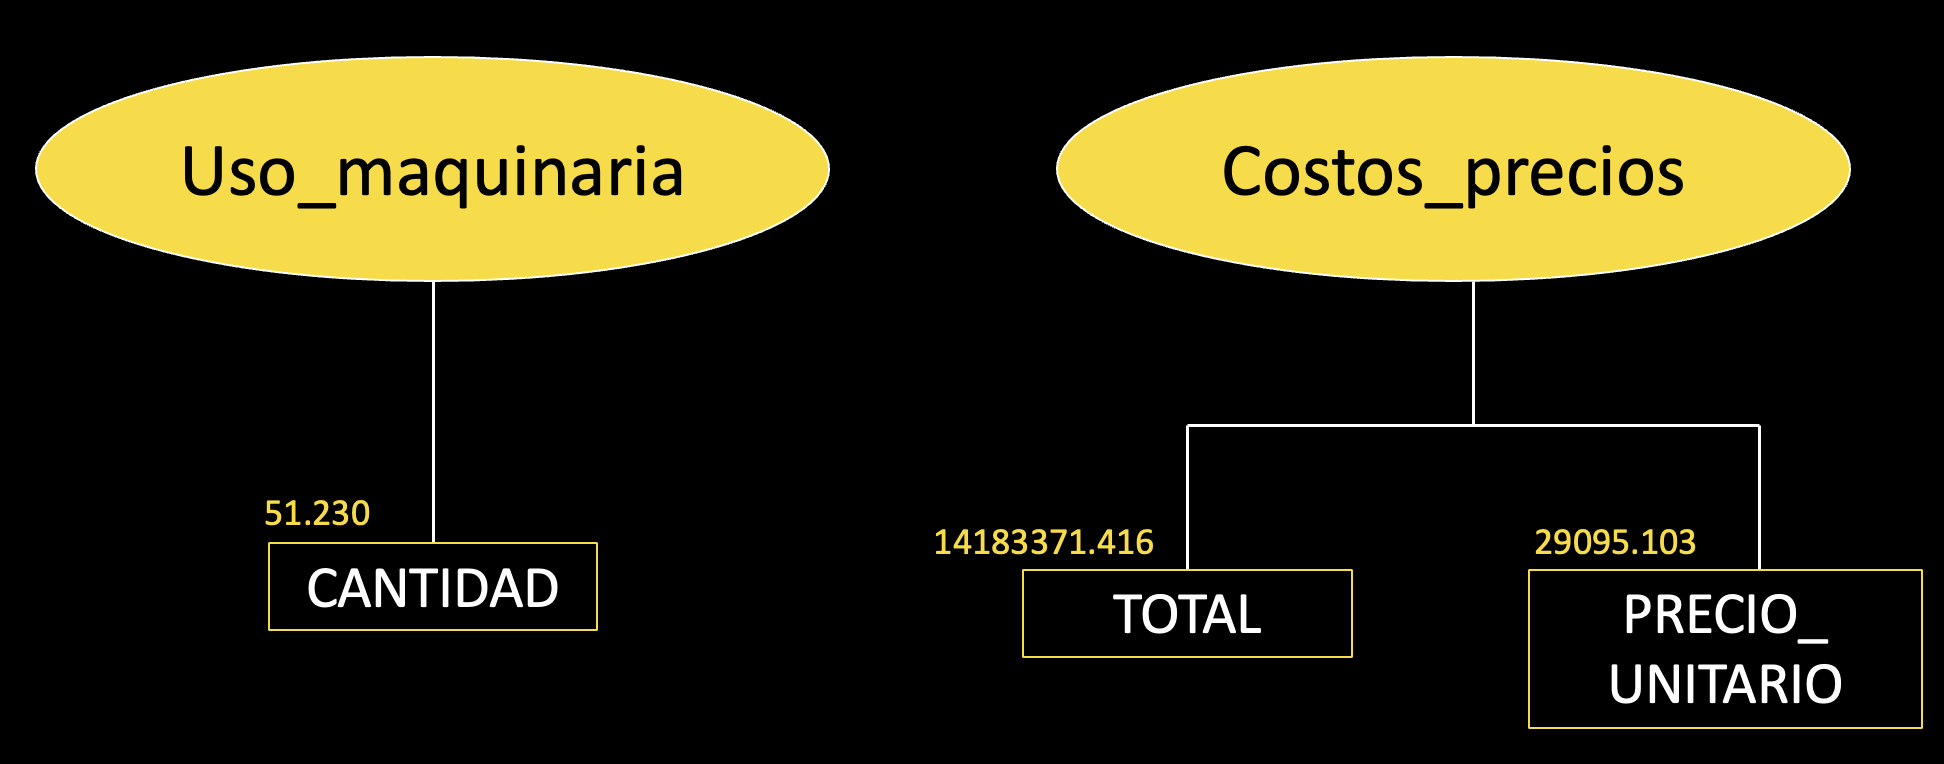

In [ ]:
from IPython.display import Image


img_path = "Diagrama.png"
display(Image(filename=img_path))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [ ]:
df.head()

,ID,FECHA,TIPO_DE_TRANSACCION,PRODUCTO,LINEA,CANTIDAD,PRECIO_UNITARIO,CLIENTE,TOTAL
0,11289,01/01/24,Renta,Rompedor de 30 kg,Demolición,26,340,Guillermo Breton,8840
1,11290,01/01/24,Renta,Vibrador eléctrico,Consolidación,9,190,Himoinsa,1710
2,11291,01/01/24,Renta,Rodillo,Compactación,19,1000,Alcarsi,19000
3,11292,01/01/24,Renta,Soldadora,Consolidación,2,700,Vladimir Gonzalez,1400
4,11293,01/01/24,Renta,Vibrador a gasolina,Consolidación,6,190,Oscar García,1140


In [ ]:
# Crear un nuevo DataFrame con las columnas 'FECHA' y 'TOTAL' y establecer 'FECHA' como índice
df1 = df[['FECHA', 'TOTAL']].set_index('FECHA')
df1.head()


,TOTAL
FECHA,
01/01/24,8840
01/01/24,1710
01/01/24,19000
01/01/24,1400
01/01/24,1140


In [ ]:
df1.index = pd.to_datetime(df1.index, dayfirst=True, errors='coerce')

# Agrupa por semana y calcula la suma de la columna 'TOTAL' para cada semana
df1 = df1.resample('W').sum()
df1.head()

,TOTAL
FECHA,
2024-01-07,170550
2024-01-14,109310
2024-01-21,108810
2024-01-28,163700
2024-02-04,195320


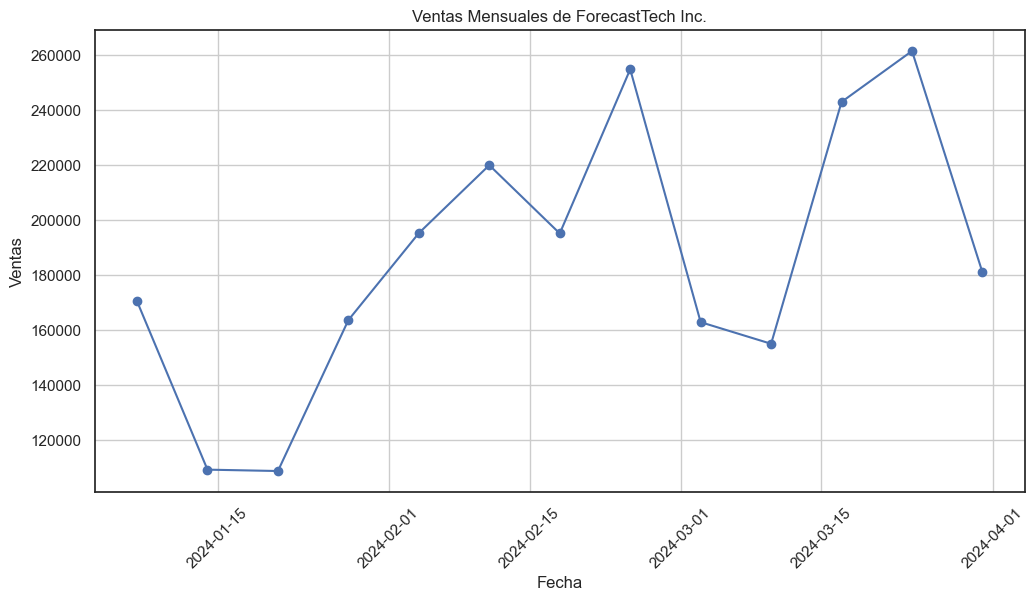

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df1.index, df1['TOTAL'], marker='o')
plt.title('Ventas Mensuales de ForecastTech Inc.')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='W',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=None,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=False                # Nivel de verbosidad
)

In [ ]:
# Verificar si el índice está en formato datetime
df1.index = pd.to_datetime(df1.index, errors='coerce')

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None


Start of Fit.....
    Target variable given as = TOTAL
Start of loading of data.....
    Inputs: ts_column = FECHA, sep = ,, target = ['TOTAL']
    Using given input: pandas dataframe...
    train time series FECHA column is the index on test data...
    train data shape = (10, 1)
Alert: Could not detect strf_time_format of FECHA. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as W
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None


kwargs for Prophet model: {'iter': 100}
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Lowering forecast period to 1 to enable cross_validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 5 Test Shape: 1


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\112hnw0d.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\crq9fmdf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=79793', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\112hnw0d.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\crq9fmdf.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_modelu8jkovef\\prophet_model-20241112190755.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:07:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:cm

    RMSE = 39,300.70
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = inf%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 6 Test Shape: 1


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\cs59zwyw.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\555gp8ot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=75232', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\cs59zwyw.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\555gp8ot.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_model1zxx2z1f\\prophet_model-20241112190756.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:07:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:cm

    RMSE = 22,118.79
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = inf%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 7 Test Shape: 1


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\dte29jj1.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\t8roj_n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=73016', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\dte29jj1.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\t8roj_n7.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_modelgctkfae5\\prophet_model-20241112190757.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:07:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:cm

    RMSE = 33,810.79
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = inf%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 8 Test Shape: 1


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\e_eko8pe.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\gv9y62t0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=69374', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\e_eko8pe.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\gv9y62t0.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_modelmkb0yf9y\\prophet_model-20241112190759.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:07:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:cm

    RMSE = 88,238.44
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = inf%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 9 Test Shape: 1


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\x366b5rm.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\4m_x1oqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=62855', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\x366b5rm.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\4m_x1oqs.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_model3f0cboug\\prophet_model-20241112190800.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:cm

    RMSE = 73,595.39
    Std Deviation of actuals = 0.00
    Normalized RMSE (as pct of std dev) = inf%
Cross Validation window: 5 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 51412.82
    MSE (Mean Squared Error = 3275851689.13
    MAPE (Mean Absolute Percent Error) = 29%
    RMSE (Root Mean Squared Error) = 57235.0565
    Normalized RMSE (MinMax) = 57%
    Normalized RMSE (as Std Dev of Actuals)= 139%
Time Taken = 7 seconds


DEBUG:cmdstanpy:TBB already found in load path
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\cqi5a4gv.json
DEBUG:cmdstanpy:input tempfile: C:\Users\damar\AppData\Local\Temp\tmp0b1_2k81\ob9yfm0u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\damar\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=55474', 'data', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\cqi5a4gv.json', 'init=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\ob9yfm0u.json', 'output', 'file=C:\\Users\\damar\\AppData\\Local\\Temp\\tmp0b1_2k81\\prophet_modelwoi9dfe2\\prophet_model-20241112190800.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
19:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Lowering forecast period to 1 to enable cross_validation
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=135.604, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=127.892, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=579762.414, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=124.619, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=122.730, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=579760.339, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.346 seconds
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=163.297, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=151.530, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=162.76

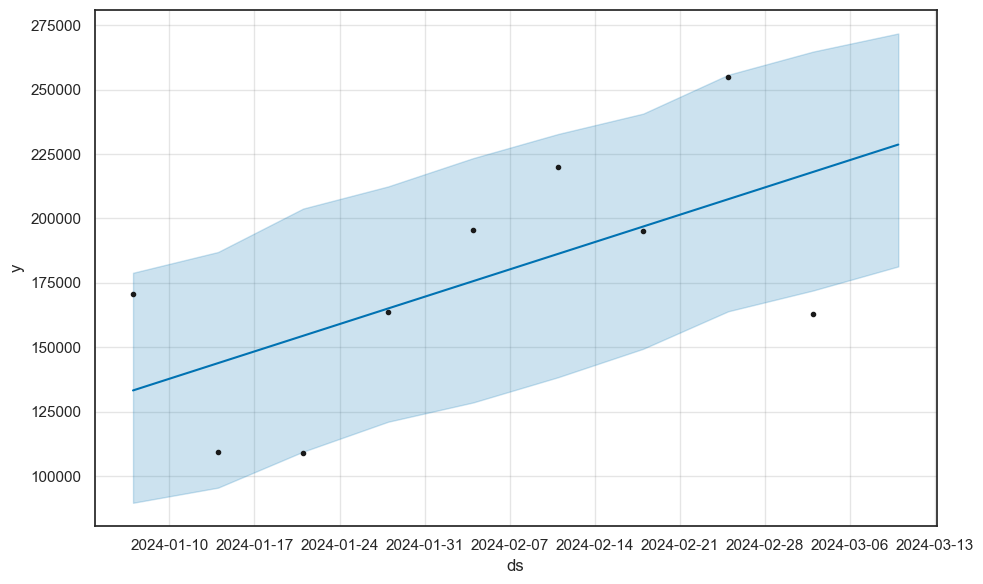

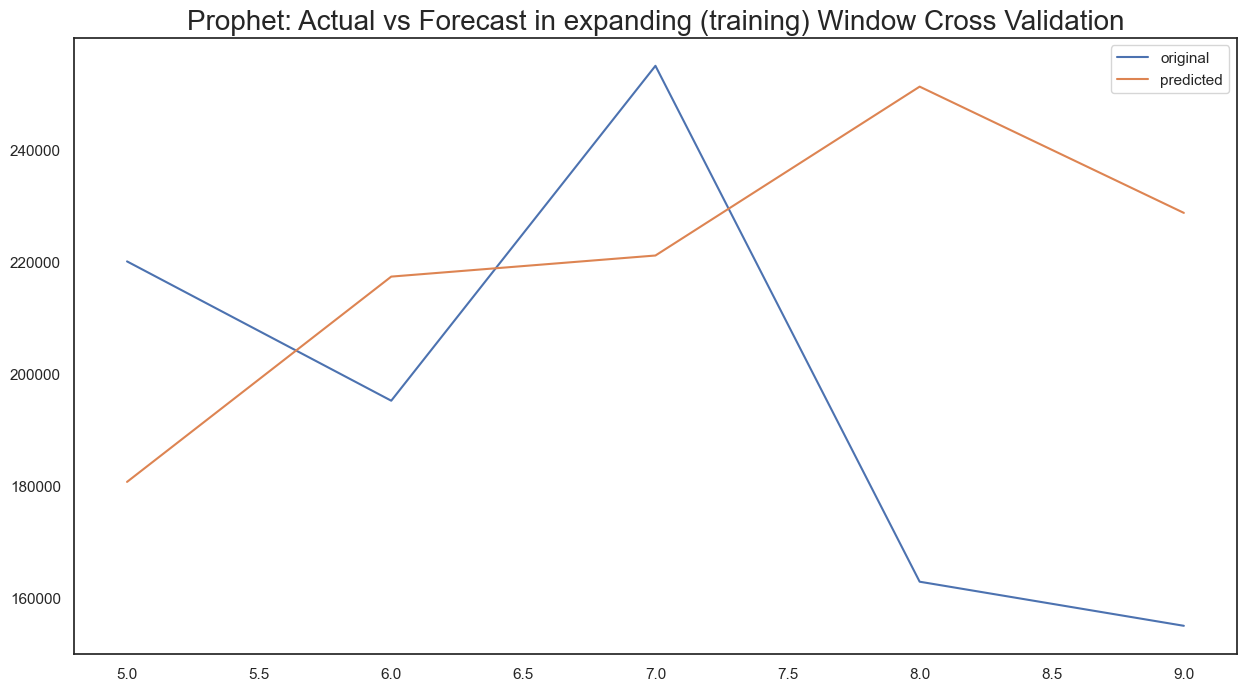

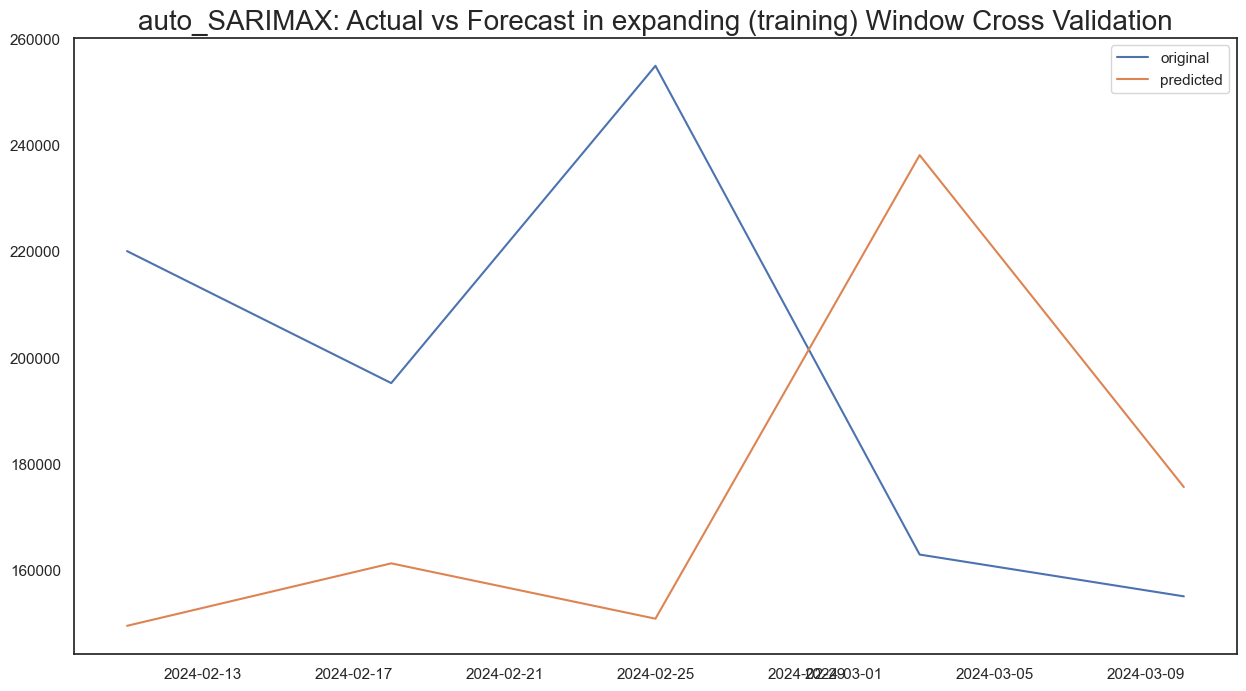

In [ ]:
train_size = int(0.8 * len(df1))
train_df = df1[:train_size]
test_df = df1[train_size:]

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='TOTAL'
)

In [ ]:
forecast = model.predict(testdata=test_df)
forecast

Predicting using test dataframe as input for Prophet model
Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10,2024-03-17,209359.027454,161645.389899,260183.529503,209359.027255,209359.027649,0.0,0.0,0.0,0.0,0.0,0.0,209359.027454
11,2024-03-24,215883.220193,163092.233191,265781.439309,215883.219555,215883.220800,0.0,0.0,0.0,0.0,0.0,0.0,215883.220193
12,2024-03-31,222407.412931,169560.645935,276240.410812,222407.411701,222407.414179,0.0,0.0,0.0,0.0,0.0,0.0,222407.412931


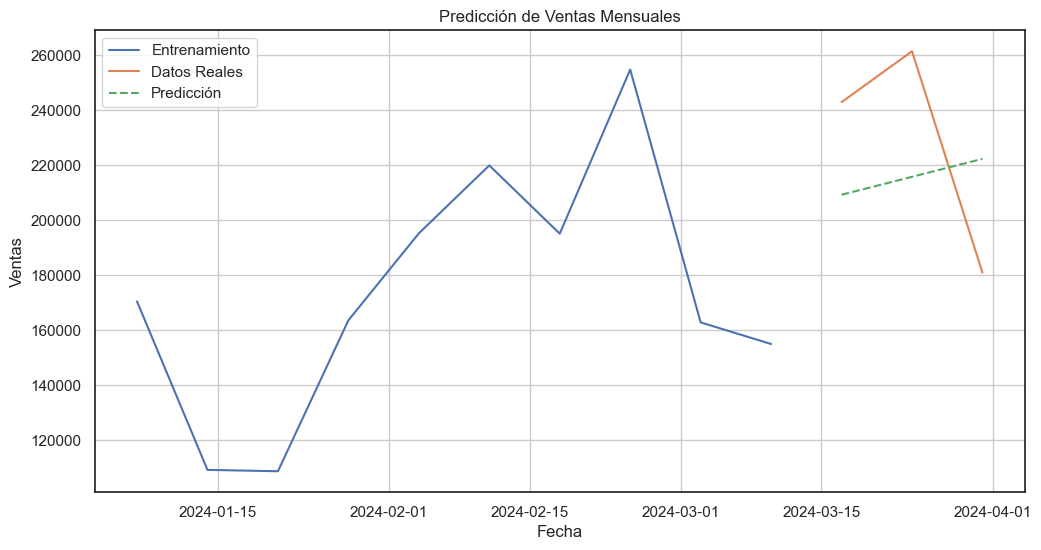

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(train_df.index, train_df['TOTAL'], label='Entrenamiento')
plt.plot(test_df.index, test_df['TOTAL'], label='Datos Reales')
plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
plt.title('Predicción de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(test_df['TOTAL'], forecast['yhat'], squared=False)
print(f'RMSE en el conjunto de prueba: {rmse:.2f}')

RMSE en el conjunto de prueba: 40542.96


In [ ]:
df1['TOTAL'].mean()

186263.07692307694